# 기본 세팅

## 폰트 설정

In [1]:
%cd C:\\Users\\User\\Desktop\\boot camp

C:\Users\User\Desktop\boot camp


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')


In [3]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
 print(mpl.font_manager.FontProperties(fname=font).get_name())
 mpl.font_manager.fontManager.addfont(font)

Noto Sans KR
NanumBarunGothicOTF
NanumBarunGothic
NanumSquare_ac
NanumBarunpen
NanumMyeongjo Eco
NanumMyeongjoOTF
NanumSquare_ac
Noto Sans KR
NanumBarunGothicOTF
NanumSquareRoundOTF
NanumSquareRound
NanumSquareRound
NanumSquareOTF_ac
NanumBarunpenOTF
NanumMyeongjo
NanumSquareRoundOTF
NanumSquareOTF
Nanum Brush Script
NanumSquare
Noto Sans KR
NanumSquareRound
NanumBarunGothic YetHangul
NanumMyeongjoOTF
NanumBarunGothic
NanumBarunGothicOTF
NanumSquareRoundOTF
NanumMyeongjo
NanumSquare
NanumGothic
NanumMyeongjo Eco
NanumSquareOTF
NanumSquare Neo ExtraBold
NanumSquare
NanumGothicOTF Eco
NanumBarunGothic
NanumGothic Eco
NanumSquareOTF_ac
NanumGothic Eco
Noto Sans KR
NanumBarunpen
NanumBarunGothicOTF YetHangul
D2Coding ligature
NanumSquareRound
NanumGothicOTF
NanumSquareOTF_ac
D2Coding
NanumMyeongjo YetHangul
NanumSquare Neo Heavy
NanumGothic
Nanum Brush Script OTF
NanumSquare_ac
NanumBarunpenOTF
NanumMyeongjo
NanumGothicOTF Eco
Nanum Pen Script
NanumGothic
NanumSquare Neo OTF Bold
NanumSqua

In [4]:
# 시스템 폰트 경로 리스트
font_list = mpl.font_manager.findSystemFonts()
print(font_list)
# 폰트 설정하기
prop = mpl.font_manager.FontProperties(fname='원하는 폰트 경로')
plt.rcParams['font.family'] = prop.get_family()

['C:\\Windows\\Fonts\\trebucit.ttf', 'C:\\Windows\\Fonts\\webdings.ttf', 'C:\\Windows\\Fonts\\ARIALNI.TTF', 'C:\\Windows\\Fonts\\HANBatangB.ttf', 'C:\\Windows\\Fonts\\ANTQUABI.TTF', 'C:\\Windows\\Fonts\\ebrimabd.ttf', 'C:\\Windows\\Fonts\\H2SA1M.TTF', 'C:\\Windows\\Fonts\\trebucbi.ttf', 'C:\\Windows\\Fonts\\GOTHIC.TTF', 'C:\\Windows\\Fonts\\BSSYM7.TTF', 'C:\\Windows\\Fonts\\segoeprb.ttf', 'C:\\Windows\\Fonts\\HMKMMAG.TTF', 'C:\\Windows\\Fonts\\ARIALNBI.TTF', 'C:\\Windows\\Fonts\\verdanai.ttf', 'C:\\Windows\\Fonts\\msgothic.ttc', 'C:\\Windows\\Fonts\\HMFMMUEX.TTC', 'C:\\Windows\\Fonts\\corbell.ttf', 'C:\\Windows\\Fonts\\pala.ttf', 'C:\\Windows\\Fonts\\calibrib.ttf', 'C:\\Windows\\Fonts\\LEELAWDB.TTF', 'C:\\Windows\\Fonts\\Candara.ttf', 'C:\\Windows\\Fonts\\holomdl2.ttf', 'C:\\Windows\\Fonts\\H2GTRM.TTF', 'C:\\Windows\\Fonts\\consolab.ttf', 'C:\\Windows\\Fonts\\ariali.ttf', 'C:\\Windows\\Fonts\\georgia.ttf', 'C:\\Windows\\Fonts\\corbelz.ttf', 'C:\\Windows\\Fonts\\msyi.ttf', 'C:\\Windows\

In [5]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


## 데이터 로드

In [6]:
import easydict
args = easydict.EasyDict() #dict values 에 .으로 접근 가능하다 

# path 정보
args.default_path = 'C:\\Users\\User\\Desktop\\' # 파일 위치 
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'submission_0331.csv' # 새로운 파일 
args.save_results = args.default_path+"model_results.csv" # 정보저장 파일 

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

In [7]:
ori_result = pd.read_csv(args.save_results)
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [8]:
ori_result

,Unnamed: 0,model,score_tr,score_te,auc_te,len_features,feaute_importances,create_dt
0,2,modelV2,0.982839,0.821818,0.894709,10,"['gender_female', 'gender_male', 'fare', 'age'...",330
1,1,modelV1,0.982839,0.825455,0.893922,10,"['gender_female', 'gender_male', 'fare', 'age'...",330
2,0,modelV0,0.982839,0.814545,0.892628,10,"['gender_male', 'fare', 'age', 'gender_female'...",330


# 데이터 확인 

In [9]:
ori_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [10]:
ori_train.head(2)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.875,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.750,NaN,Q


In [11]:
ori_test.columns # survived 가 빠짐 

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [12]:
ori_test.head(2)

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S


# train_test_split


In [13]:
ori_tr = ori_train.copy()
ori_te = ori_test.copy()

ori_tr.shape, ori_te.shape

((916, 12), (393, 11))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(ori_train, test_size=0.3, stratify=ori_train['survived'], random_state=args.random_state)

train.shape, test.shape

((641, 12), (275, 12))

In [16]:
corr_all = train.corr()

<AxesSubplot:>

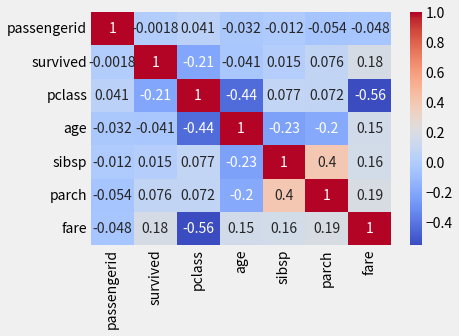

In [17]:
sns.heatmap(corr_all, annot=True, cmap='coolwarm')

In [18]:
train.groupby('embarked').mean()

,passengerid,survived,pclass,age,sibsp,parch,fare
embarked,,,,,,,
C,435.944882,0.472441,1.795276,31.633663,0.401575,0.314961,61.801805
Q,523.263158,0.508772,2.859649,27.500000,0.368421,0.035088,14.687793
S,461.923414,0.334792,2.330416,29.543769,0.533917,0.363239,25.795750


# 전처리 시작

In [19]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

# train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

In [20]:
train.drop(['ticket','cabin'], axis=1, inplace=True)

In [21]:
test.drop(['ticket','cabin'], axis=1, inplace=True)

In [22]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [23]:
train.shape , test.shape

((641, 10), (275, 10))

# EDA(continuous features)

In [24]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

age_median, fare_median, embarked_mode

(28.0, 14.5, 'S')

In [25]:
train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)


## age 

In [26]:
train.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.001806,0.041179,-0.031160,-0.011624,-0.054474,-0.048175
survived,-0.001806,1.000000,-0.214195,-0.034229,0.015226,0.075825,0.176041
pclass,0.041179,-0.214195,1.000000,-0.408701,0.077389,0.071752,-0.555652
age,-0.031160,-0.034229,-0.408701,1.000000,-0.199523,-0.178265,0.148851
sibsp,-0.011624,0.015226,0.077389,-0.199523,1.000000,0.399212,0.161138
parch,-0.054474,0.075825,0.071752,-0.178265,0.399212,1.000000,0.189171
fare,-0.048175,0.176041,-0.555652,0.148851,0.161138,0.189171,1.000000


In [27]:
continous_cols = ['age', 'fare'] + ['survived'] # 연속형이랑 타겟만 따로 만듬

train[continous_cols].describe()
# survived 가 0.337535이니까 산사람 맞추는게 어려움 -> 따라서 산사람 맞추는 feature를 만드는게 좋음 

,age,fare,survived
count,641.000000,641.000000,641.000000
mean,29.512356,31.941796,0.377535
std,13.147607,47.068732,0.485149
min,0.170000,0.000000,0.000000
25%,22.000000,7.925000,0.000000
50%,28.000000,14.500000,0.000000
75%,35.000000,30.000000,1.000000
max,80.000000,512.329200,1.000000


In [28]:
corr =train[['fare','pclass','age']].corr()

<AxesSubplot:>

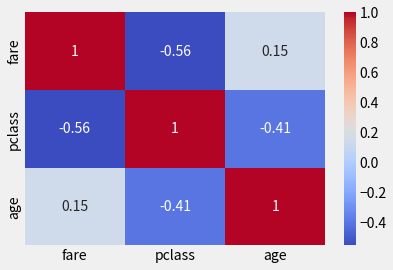

In [29]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

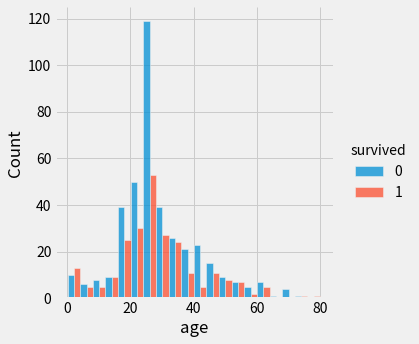

In [30]:
sns.displot(train, x='age', hue="survived", multiple="dodge", bins=20)
# 아이 세대만 죽은사람보다 산 사람이 많다

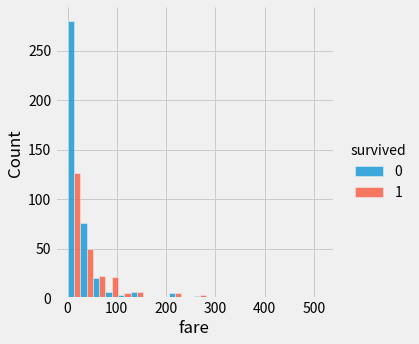

In [31]:
sns.displot(train, x='fare', hue="survived", multiple="dodge", bins=20)

In [32]:
c1 = train['age'] <= 5
train.loc[c1]['survived'].mean() # 5보다 적은 나이사람들 생존 0, 1로 표현의 평균

0.6

In [33]:
c1 = train['age'] <= 10
c2 = train['age'] > 5
c = c1 & c2
train.loc[c]['survived'].mean() # 5~10살 사이의 사람들 생존 평균

0.3125

In [34]:
c3 = train['age'] > 5
train.loc[c3]['survived'].mean() 
# 5살보다 많은 사람들의 평균이 5보다 적은 사람들의 평균보다 생존이 훨 적다 

0.3685064935064935

### age feature(5살보다 많은지 적은지)

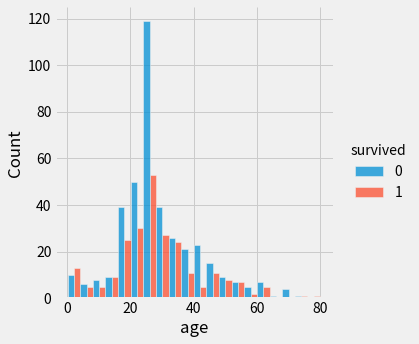

In [35]:
sns.displot(train, x="age", hue="survived", multiple="dodge",bins=20)

In [36]:
train['age'] = train['age'].astype('int')

In [37]:
train['age']

0      28
1      36
2      22
3      26
4      28
       ..
636    24
637    15
638    10
639    24
640    70
Name: age, Length: 641, dtype: int32

In [38]:
def add_new_age(age):
    if age <= 5   :
      result = '유아'
    elif (age>5) & (age <=12):
      result = '어린이'
    elif (age>12) & (age <=18):
      result = '청소년'
    elif (age>18) & (age <=39):
      result = '성인'
    elif (age>39) & (age <=49):
      result = '중년'
    elif (age>49) & (age <=64):
      result = '장년'
    else :
      result = '노인'
    return result

train['new_age'] = train['age'].map(lambda x: add_new_age(x))
test['new_age'] = test['age'].map(lambda x: add_new_age(x))
ori_te['new_age'] = ori_te['age'].map(lambda x: add_new_age(x))


In [39]:
train['gender_new_age'] = train.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
test['gender_new_age'] = test.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
ori_te['gender_new_age'] = ori_te.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)

print(f"{train['gender_new_age'].nunique()} / \n {train['gender_new_age'].unique()} \n")

14 / 
 ['male_성인' 'female_성인' 'male_중년' 'female_중년' 'female_장년' 'male_청소년'
 'female_유아' 'male_어린이' 'female_청소년' 'female_어린이' 'male_장년' 'male_유아'
 'male_노인' 'female_노인'] 



In [40]:
train['pclass_new_age'] = train.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)
test['pclass_new_age'] = test.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)
ori_te['pclass_new_age'] = ori_te.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)

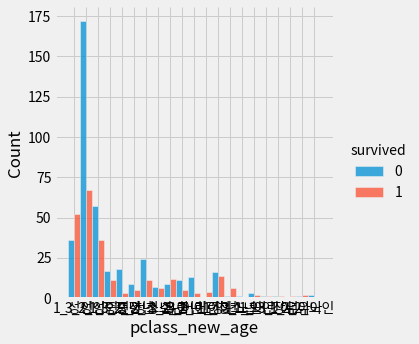

In [41]:
sns.displot(train, x="pclass_new_age", hue="survived", multiple="dodge", bins=20)

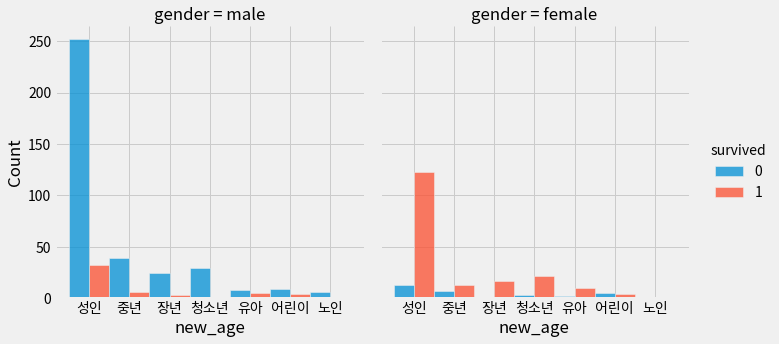

In [42]:
sns.displot(train, x="new_age", hue="survived", multiple="dodge", bins=20, col="gender")

In [43]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'fare', 'embarked', 'new_age', 'gender_new_age',
       'pclass_new_age'],
      dtype='object')

In [44]:
def add_infant(age):
  result = 0
  try:
    if age <= 5:
      result = 1
  except:
    pass
  return result

train['infant'] = train['age'].map(lambda x: add_infant(x))
test['infant'] = test['age'].map(lambda x: add_infant(x))
ori_te['infant'] = ori_te['age'].map(lambda x: add_infant(x))

print(f"{train['infant'].nunique()} / \n {train['infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

2 / 
 [0 1] 



((641, 14), (275, 14), (393, 15))

In [45]:
train['gender_infant'] = train.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
test['gender_infant'] = test.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
ori_te['gender_infant'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
# 성별과 5살 미만인지 유무에 따라 새로운 feature를 만듬 

print(f"{train['gender_infant'].nunique()} / \n {train['gender_infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

4 / 
 ['male_0' 'female_0' 'female_1' 'male_1'] 



((641, 15), (275, 15), (393, 16))

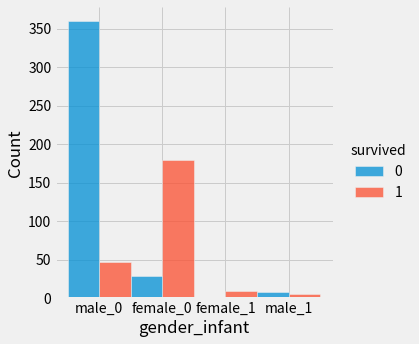

In [46]:
sns.displot(train, x="gender_infant", hue="survived", multiple="dodge")

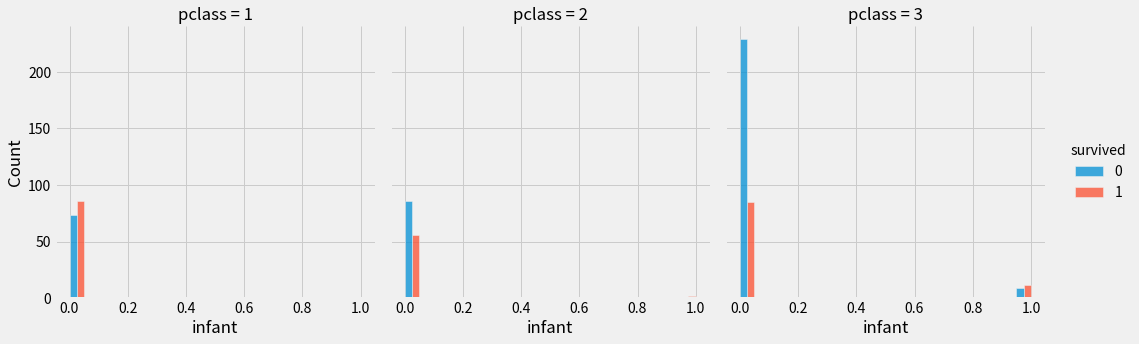

In [47]:
sns.displot(train, x="infant", hue="survived", multiple="dodge", bins=20, col="pclass")

In [48]:
def add_pclass_1(pclass):
  result = 'high pclass(1)'
  try:
    if pclass == 3 or pclass == 2 :
      result = 'low pcalss(2,3)'
  except:
    pass
  return result

In [49]:
train['pclass_1'] = train['pclass'].map(lambda x: add_pclass_1(x))
test['pclass_1'] = test['pclass'].map(lambda x: add_pclass_1(x))
ori_te['pclass_1'] = ori_te['pclass'].map(lambda x: add_pclass_1(x))

In [50]:
train['pclass1_gender'] = train.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)
test['pclass1_gender'] = test.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)
ori_te['pclass1_gender'] = ori_te.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)

In [51]:
def add_pclass_3(pclass):
  result = 'high pcalss(3)'
  try:
    if pclass == 1 or pclass == 2 :
      result = 'low pcalss(1,2)'
  except:
    pass
  return result

In [52]:
train['pclass_3'] = train['pclass'].map(lambda x: add_pclass_3(x))
test['pclass_3'] = test['pclass'].map(lambda x: add_pclass_3(x))
ori_te['pclass_3'] = ori_te['pclass'].map(lambda x: add_pclass_3(x))

In [53]:
train['pclass3_infant'] = train.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)
test['pclass3_infant'] = test.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)
ori_te['pclass3_infant'] = ori_te.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)

In [54]:
train['pclass3_gender'] = train.apply(lambda row: row['gender']+'_'+row['pclass_3'], axis=1)
test['pclass3_gender'] = test.apply(lambda row: row['gender']+'_'+row['pclass_3'], axis=1)
ori_te['pclass3_gender'] = ori_te.apply(lambda row: row['gender']+'_'+row['pclass_3'], axis=1)

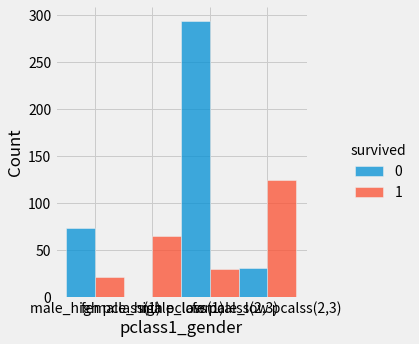

In [55]:
sns.displot(train, x="pclass1_gender", hue="survived", multiple="dodge")

In [56]:
train['pclass1_gender'].unique()

array(['male_high pclass(1)', 'female_high pclass(1)',
       'male_low pcalss(2,3)', 'female_low pcalss(2,3)'], dtype=object)

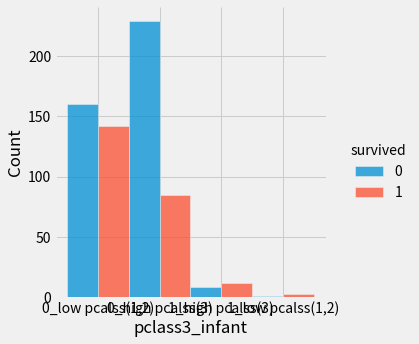

In [57]:
sns.displot(train, x="pclass3_infant", hue="survived", multiple="dodge")

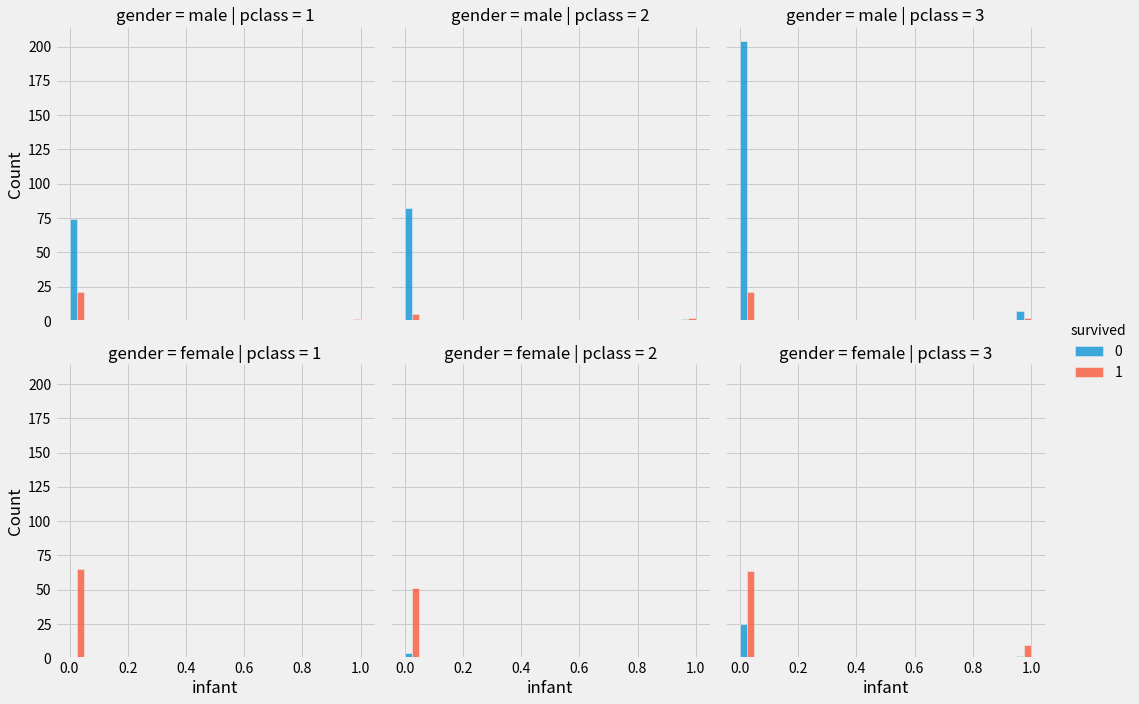

In [58]:
sns.displot(train, x="infant", hue="survived", multiple="dodge", bins=20, col='pclass',row='gender')
            # sns.displot(train, x="age", hue="survived", multiple="dodge", bins=20, col="pclass", row='gender')

## fare

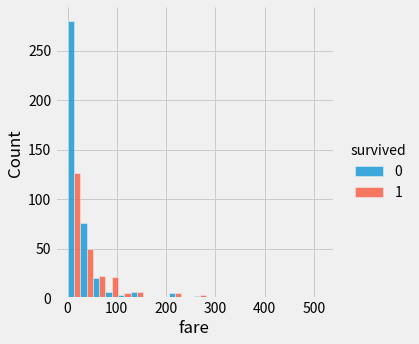

In [59]:
sns.displot(train, x="fare", hue="survived", multiple="dodge", bins=20)

In [60]:
c11 = train['fare'] <= 51
train.loc[c11]['survived'].mean() #fare 51보다 적은 사람들 생존 평균

0.3308270676691729

In [61]:
c12 = train['fare'] > 52
train.loc[c12]['survived'].mean() # fare 52보다 큰 사람들 생존 평균

0.6153846153846154

In [62]:
def fare_leval(fare):
    if fare <= 51   :
      result = 'low fare'
    else :
      result = 'high fare'
    return result

train['fare_leval'] = train['fare'].map(lambda x: fare_leval(x))
test['fare_leval'] = test['fare'].map(lambda x: fare_leval(x))
ori_te['fare_leval'] = ori_te['fare'].map(lambda x: fare_leval(x))


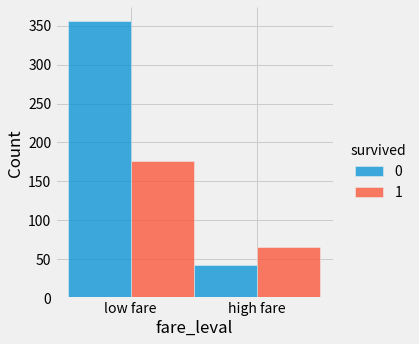

In [63]:
sns.displot(train, x="fare_leval", hue="survived", multiple="dodge", bins=20)

In [64]:
train['gender_fare_level'] = train.apply(lambda row: row['gender']+'_'+row['fare_leval'], axis=1)
test['gender_fare_level'] = test.apply(lambda row: row['gender']+'_'+row['fare_leval'], axis=1)
ori_te['gender_fare_level'] = ori_te.apply(lambda row: row['gender']+'_'+row['fare_leval'], axis=1)

print(f"{train['gender_fare_level'].nunique()} / \n {train['gender_fare_level'].unique()} \n")

4 / 
 ['male_low fare' 'female_high fare' 'female_low fare' 'male_high fare'] 



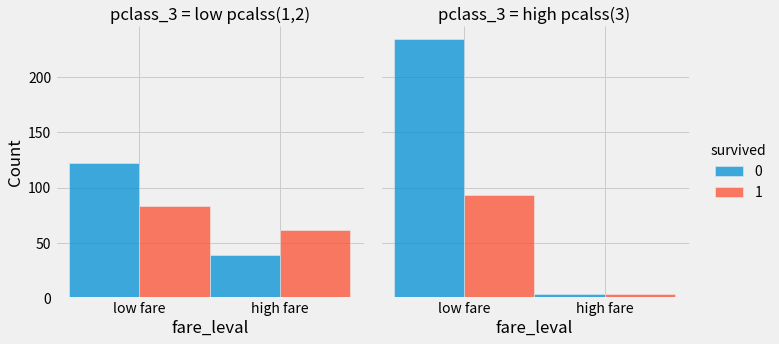

In [65]:
sns.displot(train, x="fare_leval", hue="survived", multiple="dodge", bins=20,col='pclass_3')

In [66]:
train['pclass_3_fare_level'] = train.apply(lambda row: row['pclass_3']+'_'+row['fare_leval'], axis=1)
test['pclass_3_fare_level'] = test.apply(lambda row: row['pclass_3']+'_'+row['fare_leval'], axis=1)
ori_te['pclass_3_fare_level'] = ori_te.apply(lambda row: row['pclass_3']+'_'+row['fare_leval'], axis=1)

print(f"{train['pclass_3_fare_level'].nunique()} / \n {train['pclass_3_fare_level'].unique()} \n")

4 / 
 ['low pcalss(1,2)_low fare' 'low pcalss(1,2)_high fare'
 'high pcalss(3)_low fare' 'high pcalss(3)_high fare'] 



In [67]:
train['pclass_1_fare_level'] = train.apply(lambda row: row['pclass_1']+'_'+row['fare_leval'], axis=1)
test['pclass_1_fare_level'] = test.apply(lambda row: row['pclass_1']+'_'+row['fare_leval'], axis=1)
ori_te['pclass_1_fare_level'] = ori_te.apply(lambda row: row['pclass_1']+'_'+row['fare_leval'], axis=1)

print(f"{train['pclass_1_fare_level'].nunique()} / \n {train['pclass_1_fare_level'].unique()} \n")

4 / 
 ['high pclass(1)_low fare' 'high pclass(1)_high fare'
 'low pcalss(2,3)_low fare' 'low pcalss(2,3)_high fare'] 



In [68]:
train['new_age_fare_level'] = train.apply(lambda row: row['new_age']+'_'+row['fare_leval'], axis=1)
test['new_age_fare_level'] = test.apply(lambda row: row['new_age']+'_'+row['fare_leval'], axis=1)
ori_te['new_age_fare_level'] = ori_te.apply(lambda row: row['new_age']+'_'+row['fare_leval'], axis=1)

print(f"{train['new_age_fare_level'].nunique()} / \n {train['new_age_fare_level'].unique()} \n")

14 / 
 ['성인_low fare' '성인_high fare' '중년_low fare' '장년_low fare' '청소년_low fare'
 '청소년_high fare' '유아_low fare' '어린이_low fare' '중년_high fare'
 '장년_high fare' '노인_low fare' '어린이_high fare' '유아_high fare'
 '노인_high fare'] 



In [69]:
def social(age):
    if age <=19:
      result = '어린'
    elif (age >=20) & (age<=39):
      result = '사회초년생'
    else :
      result = '사회인'  
    return result

train['social'] = train['age'].map(lambda x: social(x))
test['social'] = test['age'].map(lambda x: social(x))
ori_te['social'] = ori_te['age'].map(lambda x: social(x))

In [70]:
train['social_fare_level'] = train.apply(lambda row: row['social']+'_'+row['fare_leval'], axis=1)
test['social_fare_level'] = test.apply(lambda row: row['social']+'_'+row['fare_leval'], axis=1)
ori_te['social_fare_level'] = ori_te.apply(lambda row: row['social']+'_'+row['fare_leval'], axis=1)

print(f"{train['social_fare_level'].nunique()} / \n {train['social_fare_level'].unique()} \n")

6 / 
 ['사회초년생_low fare' '사회초년생_high fare' '사회인_low fare' '어린_low fare'
 '어린_high fare' '사회인_high fare'] 



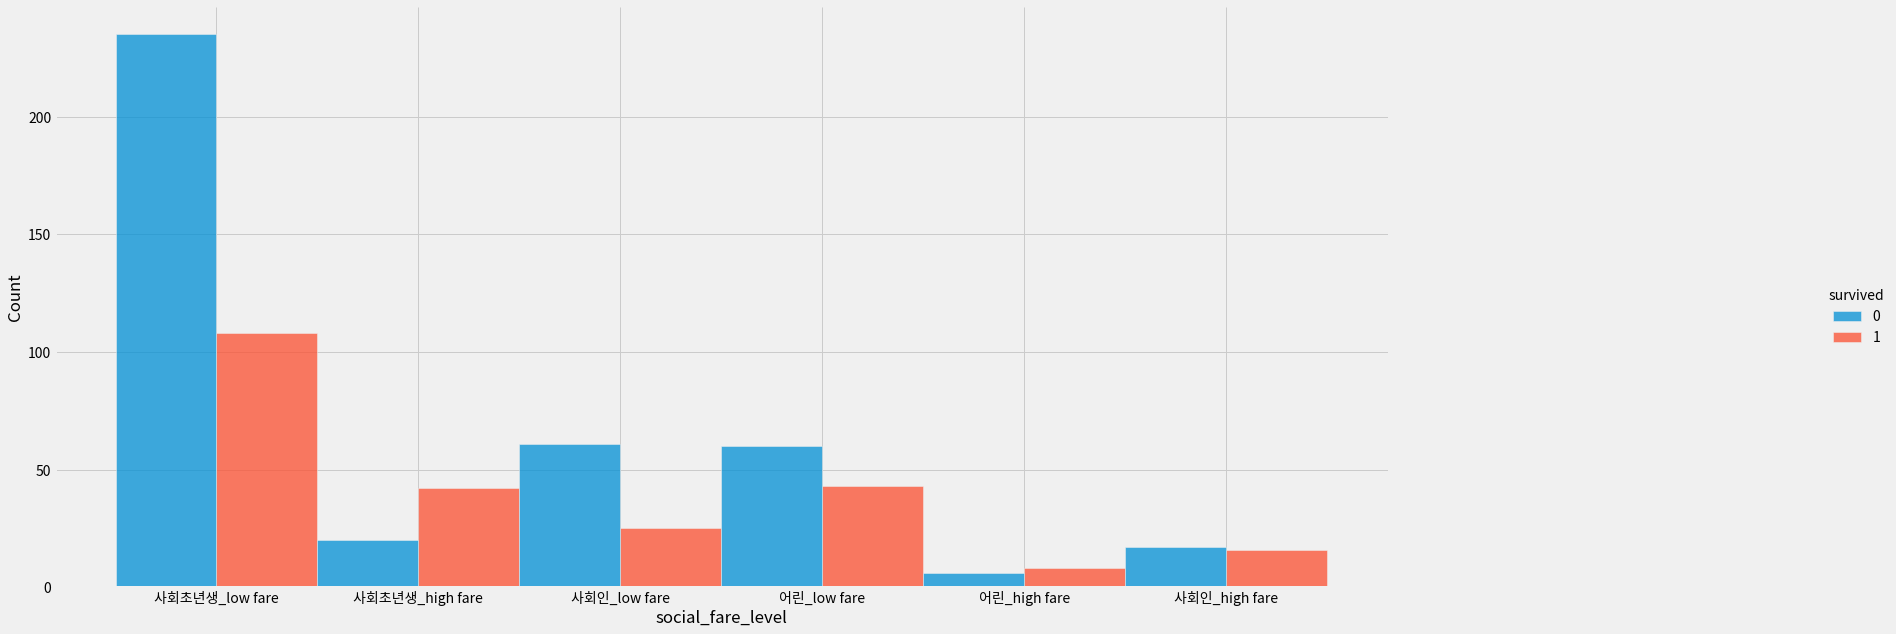

In [71]:
fig = sns.displot(train, x="social_fare_level", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

## pclass ,sibsp , parch

In [72]:
train.groupby('pclass').mean()

,passengerid,survived,age,sibsp,parch,fare,infant
pclass,,,,,,,
1,444.242236,0.540373,37.881988,0.416149,0.254658,80.628261,0.006211
2,461.772414,0.400000,30.737931,0.379310,0.282759,20.489022,0.020690
3,471.074627,0.289552,24.919403,0.579104,0.376119,13.500397,0.062687


In [73]:
train['family'] = train['sibsp']+train['parch']+1
test['family'] = train['sibsp']+train['parch']+1
ori_te['family'] = train['sibsp']+train['parch']+1

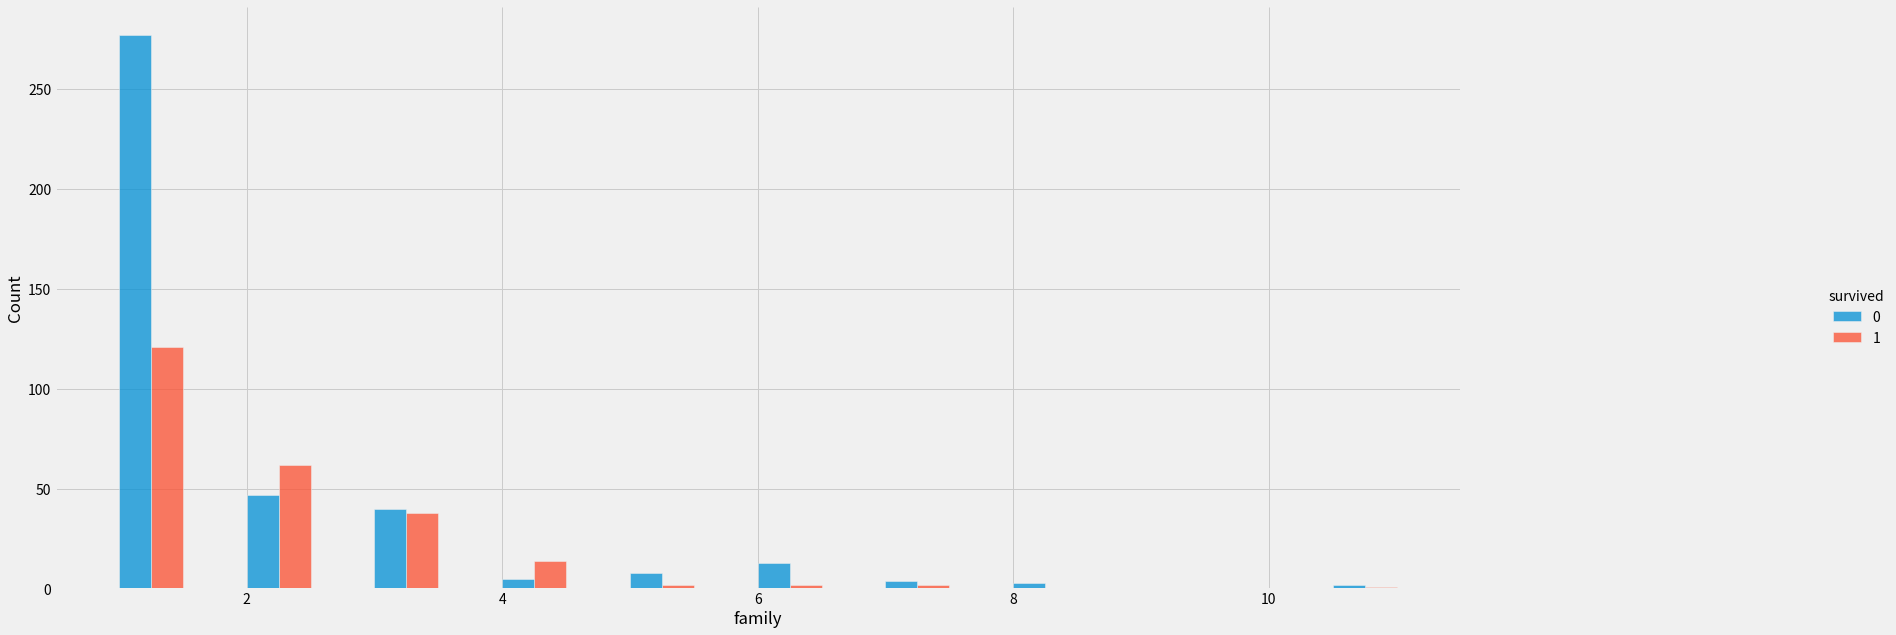

In [74]:
fig = sns.displot(train, x="family", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

In [75]:
def family_size(family):
    if family == 1   :
      result = 'lone family'
    elif (family >= 2) & (family <=4) :
      result = 'small family'
    else:
      result = 'big family'
    return result

train['family_size'] = train['family'].map(lambda x: family_size(x))
test['family_size'] = test['family'].map(lambda x: family_size(x))
ori_te['family_size'] = ori_te['family'].map(lambda x: family_size(x))


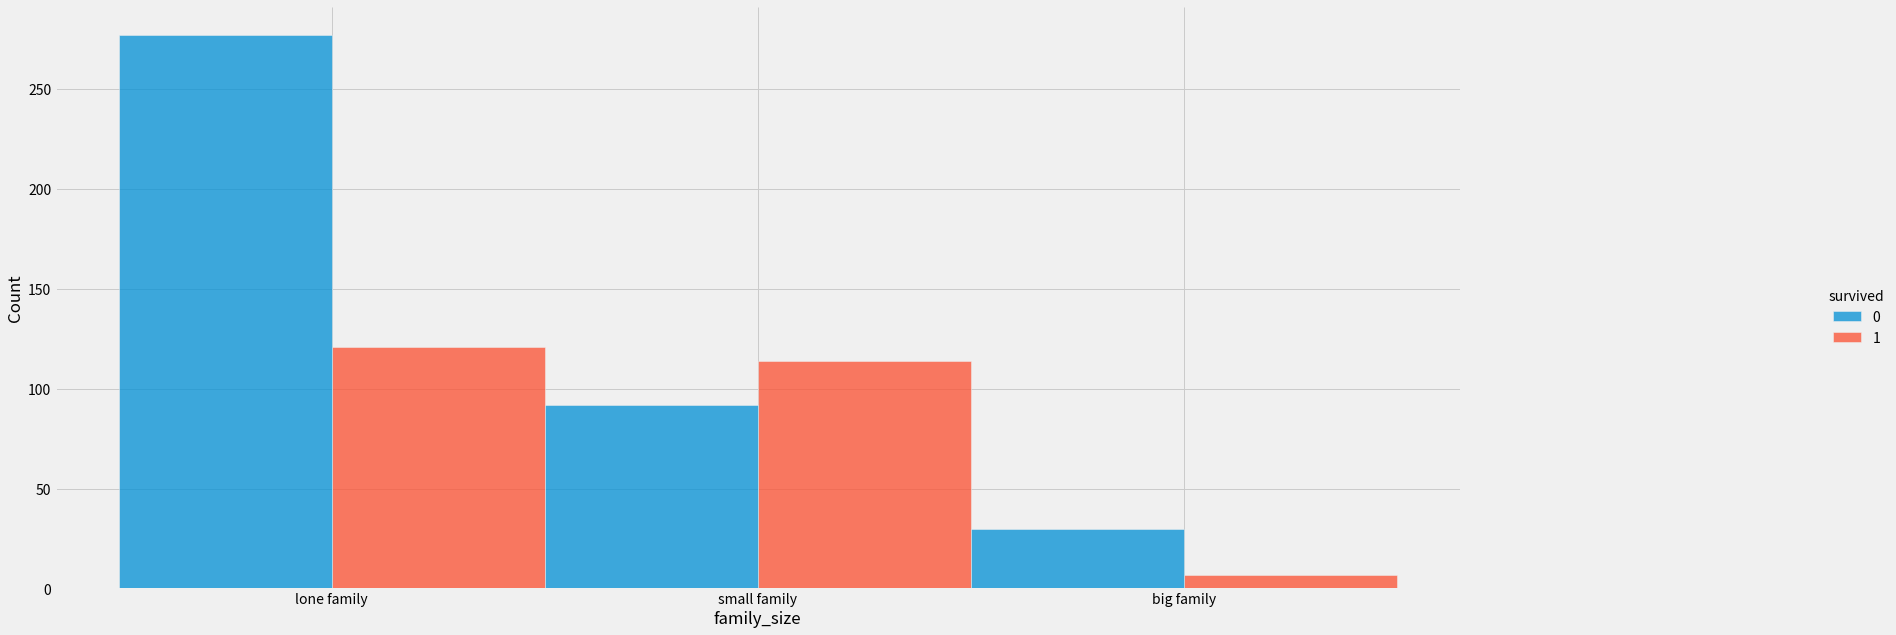

In [76]:
fig = sns.displot(train, x="family_size", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

In [77]:
def general_family(family):
    if (family ==2) or (family ==3) or (family ==4)  :
      result = 'general family'
    else :
      result = 'not general family'
    return result

train['general_family'] = train['family'].map(lambda x: general_family(x))
test['general_family'] = test['family'].map(lambda x: general_family(x))
ori_te['general_family'] = ori_te['family'].map(lambda x: general_family(x))


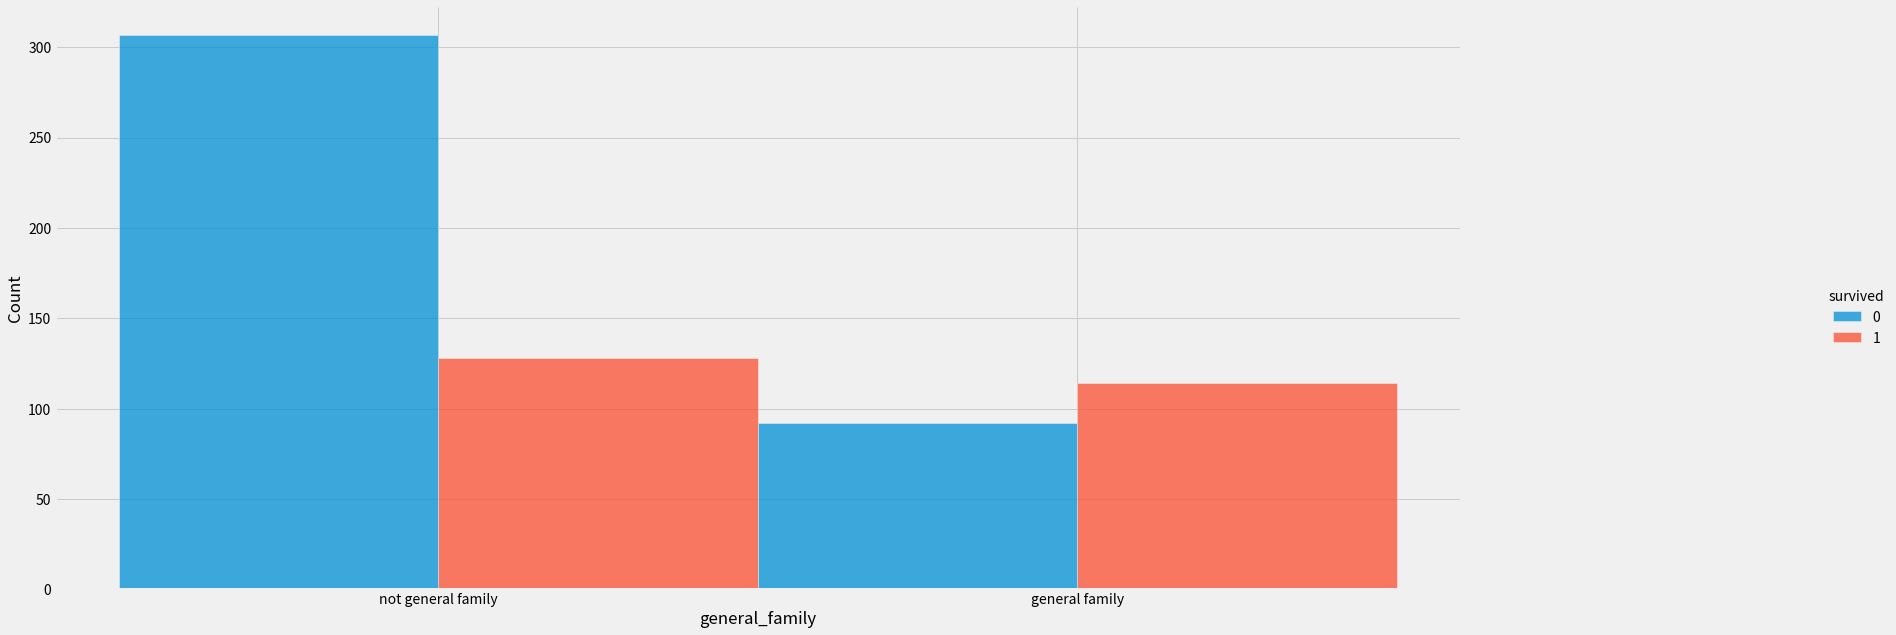

In [78]:
fig = sns.displot(train, x="general_family", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

In [79]:
def add_sibsp(sibsp):
  result = 'small sib'
  try:
    if sibsp >=2 :
      result = 'large sib'
  except:
    pass
  return result

train['sibsp_2_high'] = train['sibsp'].map(lambda x: add_sibsp(x))
test['sibsp_2_high'] = test['sibsp'].map(lambda x: add_sibsp(x))
ori_te['sibsp_2_high'] = ori_te['sibsp'].map(lambda x: add_sibsp(x))

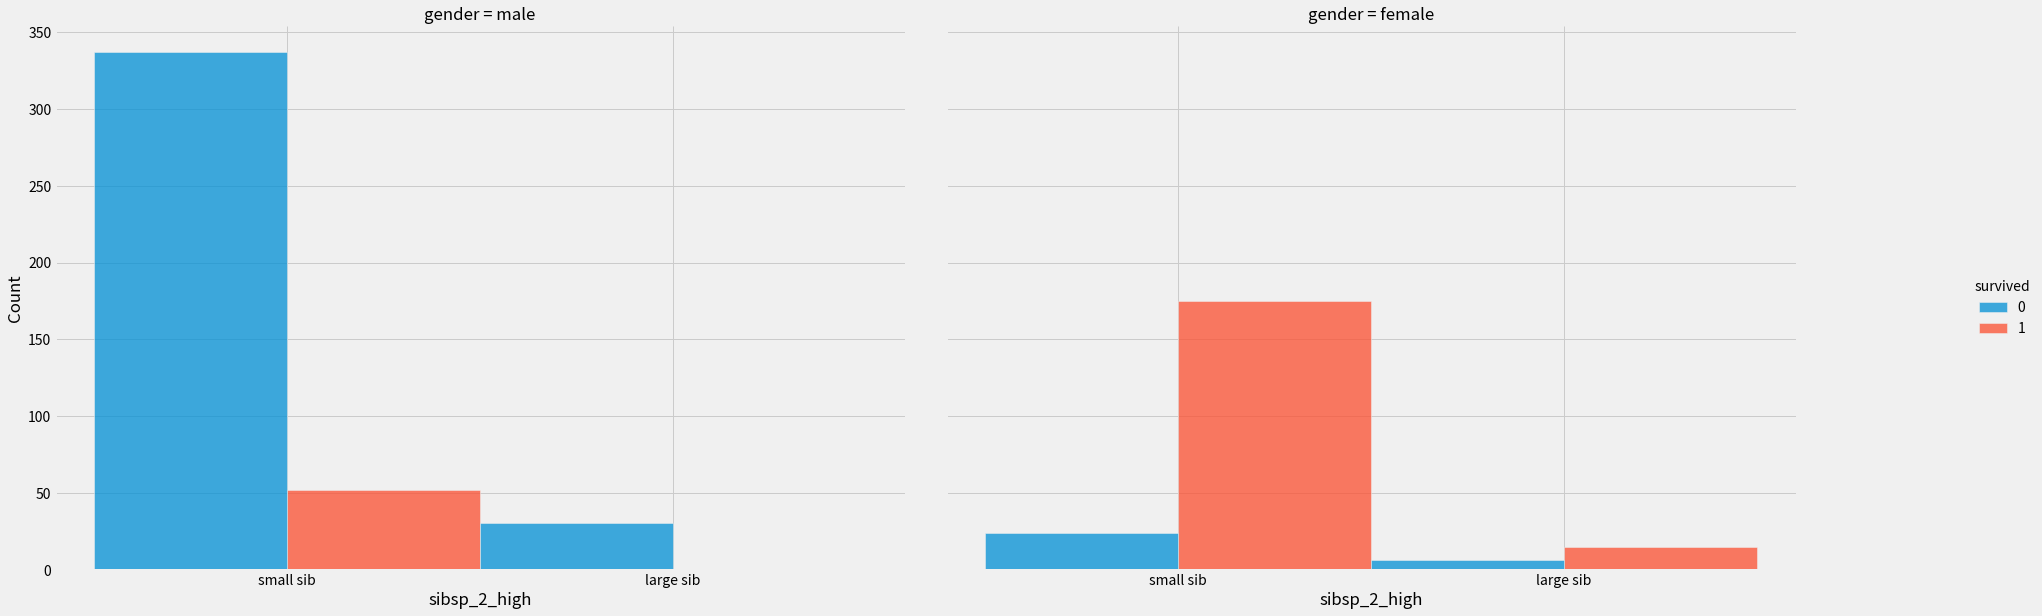

In [80]:
fig = sns.displot(train, x="sibsp_2_high", hue="survived", multiple="dodge", bins=20, col="gender")
fig.fig.set_size_inches(30,10)

In [81]:
train['sibsp_2_high_infant'] = train.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)
test['sibsp_2_high_infant'] = test.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)
ori_te['sibsp_2_high_infant'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)

In [82]:
train['sibsp_2_high_new_age'] = train.apply(lambda row: row['sibsp_2_high']+'_'+row['new_age'], axis=1)
test['sibsp_2_high_new_age'] = test.apply(lambda row: row['sibsp_2_high']+'_'+row['new_age'], axis=1)
ori_te['sibsp_2_high_new_age'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+row['new_age'], axis=1)

In [83]:
train['sibsp_2_high_gender'] = train.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)
test['sibsp_2_high_gender'] = test.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)
ori_te['sibsp_2_high_gender'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)

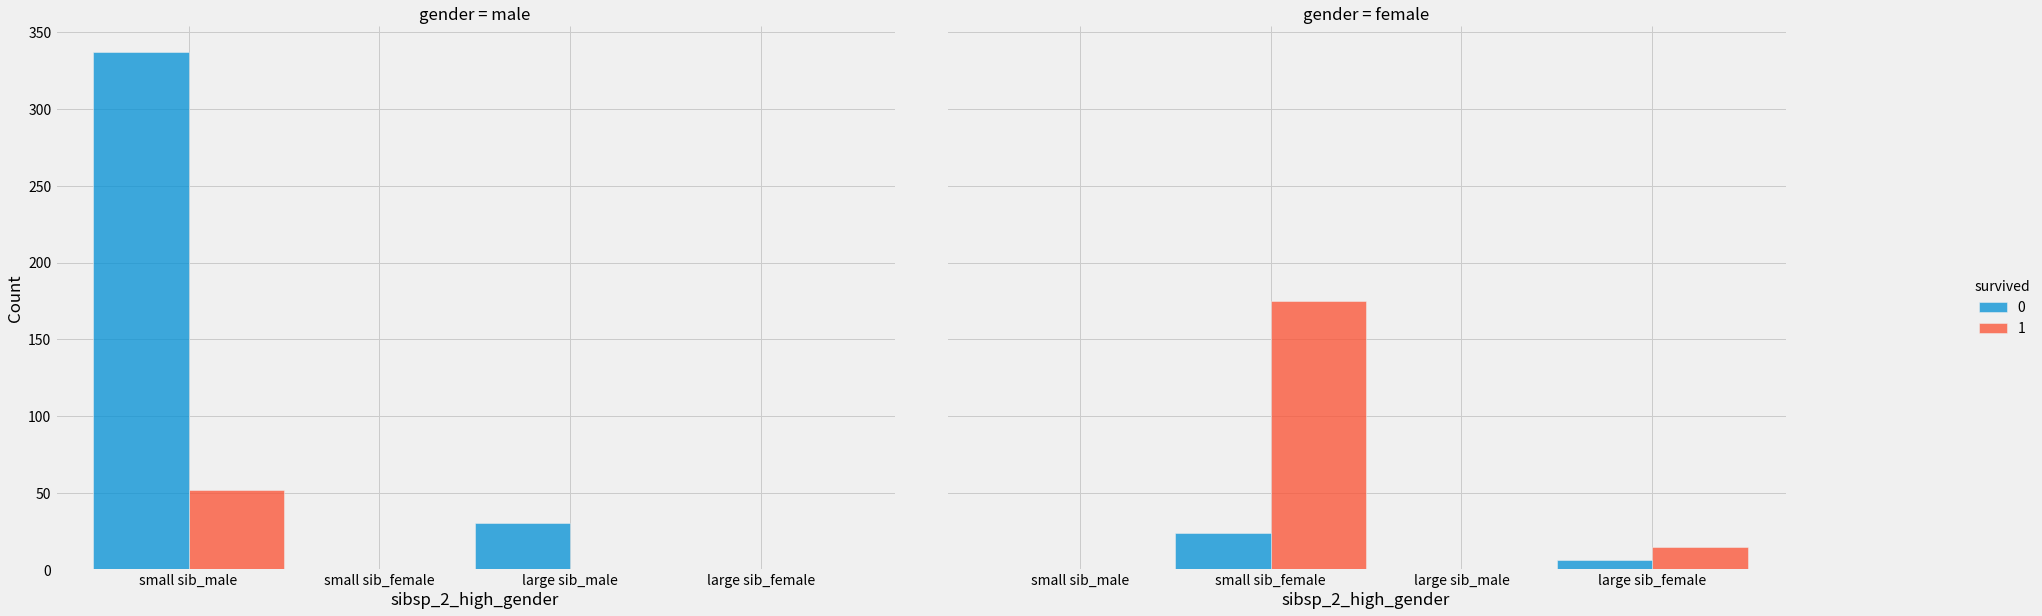

In [84]:
fig = sns.displot(train, x="sibsp_2_high_gender", hue="survived", multiple="dodge", bins=20, col="gender")
fig.fig.set_size_inches(30,10)

In [85]:
train['parch'].value_counts()

0    504
1     86
2     41
3      4
4      3
5      2
6      1
Name: parch, dtype: int64

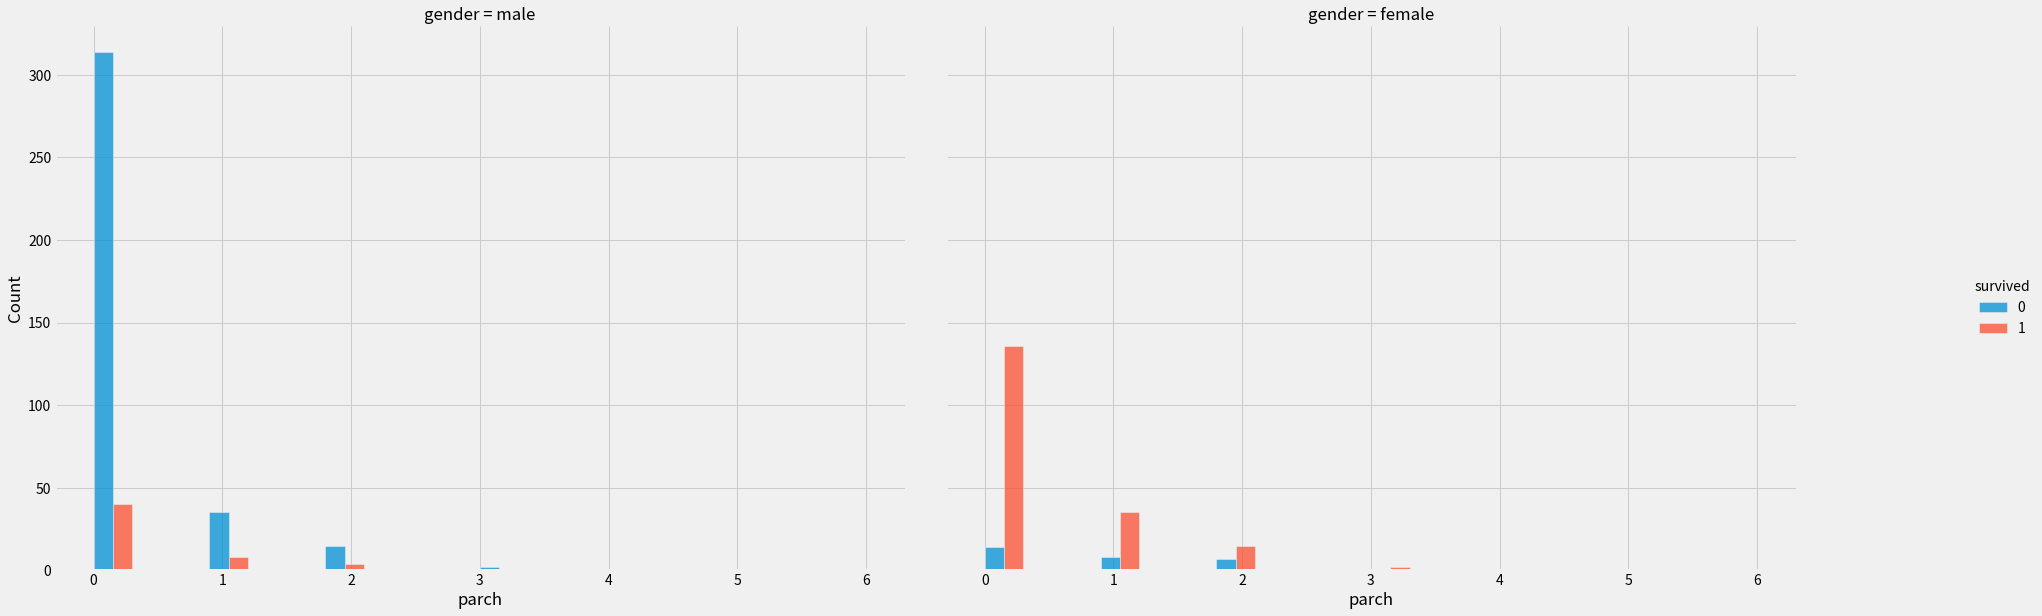

In [86]:
fig = sns.displot(train, x="parch", hue="survived", multiple="dodge", bins=20, col="gender")
fig.fig.set_size_inches(30,10)

In [87]:
train['pclass_3_gender'] = train.apply(lambda row: row['pclass_3']+'_'+row['gender'], axis=1)
test['pclass_3_gender'] = test.apply(lambda row: row['pclass_3']+'_'+row['gender'], axis=1)
ori_te['pclass_3_gender'] = ori_te.apply(lambda row: row['pclass_3']+'_'+row['gender'], axis=1)

print(f"{train['pclass_3_gender'].nunique()} / \n {train['pclass_3_gender'].unique()} \n")

4 / 
 ['low pcalss(1,2)_male' 'low pcalss(1,2)_female' 'high pcalss(3)_male'
 'high pcalss(3)_female'] 



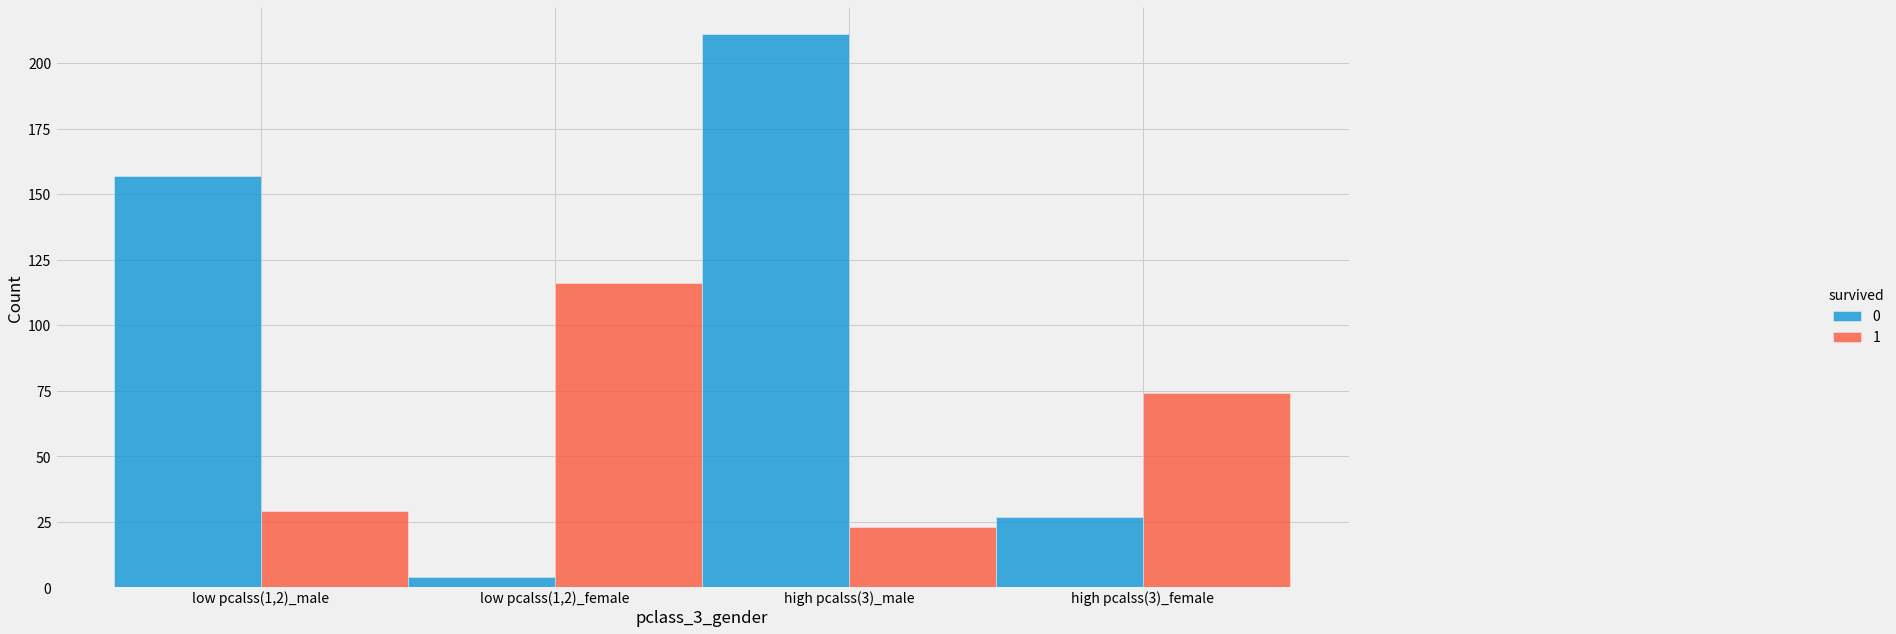

In [88]:
fig = sns.displot(train, x="pclass_3_gender", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

## name

In [132]:
train['name']

0                           Klaber, Mr. Herman
1                     Young, Miss. Marie Grice
2                             Davies, Mr. Evan
3                            Kink, Mr. Vincenz
4                         Linehan, Mr. Michael
                        ...                   
636                   Salander, Mr. Karl Johan
637    Yasbeck, Mrs. Antoni (Selini Alexander)
638                  Van Impe, Miss. Catharina
639                         Giglio, Mr. Victor
640               Crosby, Capt. Edward Gifford
Name: name, Length: 641, dtype: object

In [100]:
train['initial_name'] = train['name'].str.split(',').str[1]
test['initial_name'] = test['name'].str.split(',').str[1]
ori_te['initial_name'] = ori_te['name'].str.split(',').str[1]

In [102]:
train['initial_name'] = train['initial_name'].str.split('.').str[0]
test['initial_name'] = test['initial_name'].str.split('.').str[0]
ori_te['initial_name'] = ori_te['initial_name'].str.split('.').str[0]

In [103]:
train['initial_name'].value_counts()

 Mr              371
 Miss            127
 Mrs              93
 Master           32
 Rev               5
 Dr                4
 Col               3
 Major             2
 Jonkheer          1
 the Countess      1
 Sir               1
 Capt              1
Name: initial_name, dtype: int64

In [105]:
train['initial_name'] = np.where(train['initial_name'].isin([' Mr',' Miss',' Mrs',' Master']), train['initial_name'], 'Others')
test['initial_name'] = np.where(test['initial_name'].isin([' Mr',' Miss',' Mrs',' Master']), test['initial_name'], 'Others')
ori_te['initial_name'] = np.where(ori_te['initial_name'].isin([' Mr',' Miss',' Mrs',' Master']), ori_te['initial_name'], 'Others')

In [106]:
train['initial_name'].value_counts()

 Mr        371
 Miss      127
 Mrs        93
 Master     32
Others      18
Name: initial_name, dtype: int64

In [ ]:
Mr # 기혼 or 미혼
sibsp # 배우자 / 자매
# Mr 이면서 sibsp >

In [107]:
def marriage(initial_name, sibsp):
  try:
    if ((initial_name ==' Mr')&(sibsp >=1)) or (initial_name== ' Mrs'):
      result = '결혼'
    elif ((initial_name == ' Mr')&(sibsp<1))or (initial_name==' Miss'):
      result = '미혼'
    elif initial_name == ' Master':
      result = '아기'
    else:
      result = '판단불가'
  except:
    pass
  return result

train['marriage'] = train.apply(lambda x: marriage(x['initial_name'],x['sibsp']),axis=1)
test['marriage'] = test.apply(lambda x: marriage(x['initial_name'],x['sibsp']),axis=1)
ori_te['marriage'] = ori_te.apply(lambda x: marriage(x['initial_name'],x['sibsp']),axis=1)

print(f"{train['marriage'].nunique()} / \n {train['marriage'].unique()} \n")
train.shape, test.shape, ori_te.shape

4 / 
 ['미혼' '결혼' '아기' '판단불가'] 



((641, 37), (275, 37), (393, 38))

In [108]:
train['marriage'].value_counts()

미혼      425
결혼      166
아기       32
판단불가     18
Name: marriage, dtype: int64

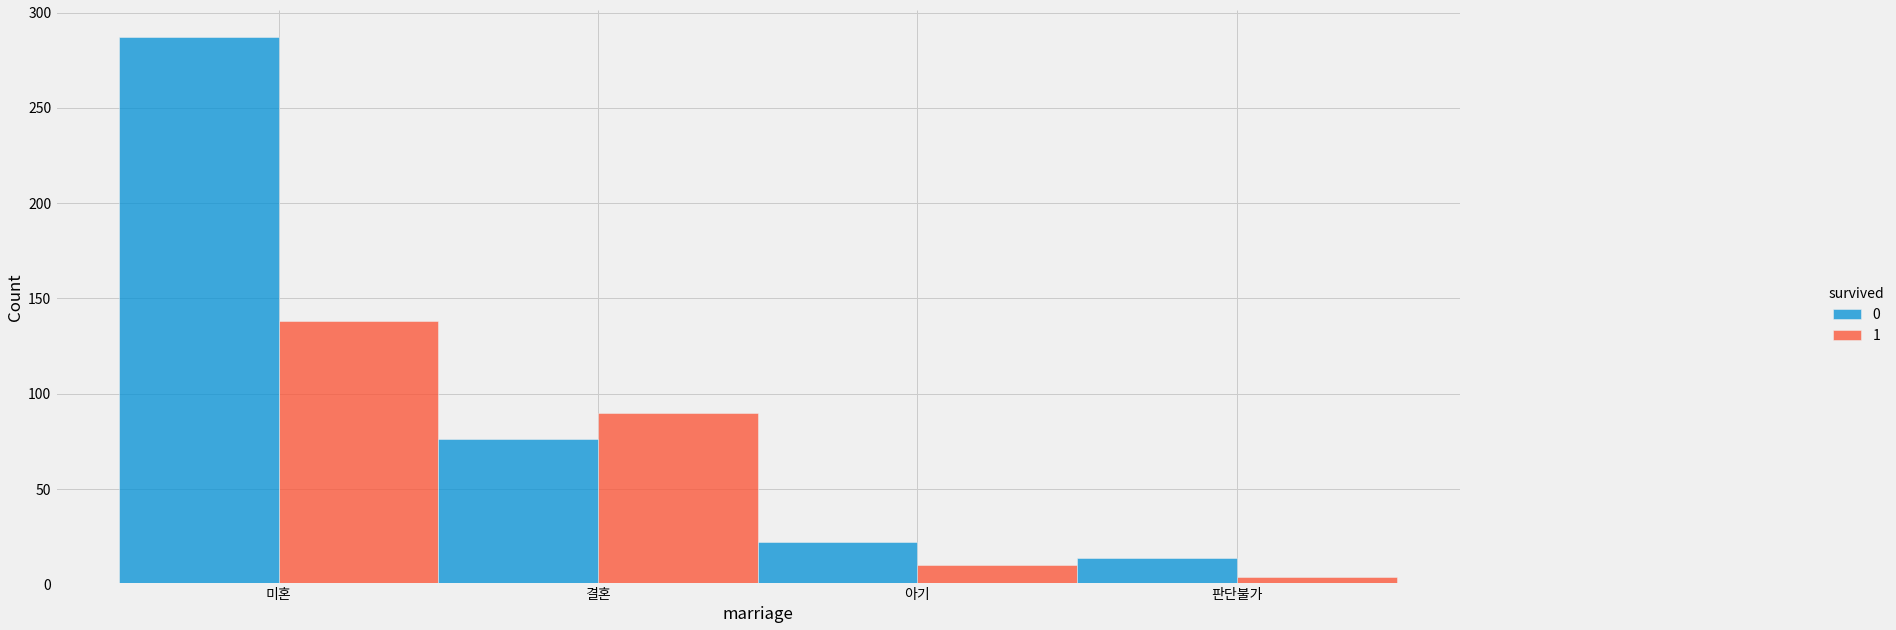

In [109]:
fig = sns.displot(train, x="marriage", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

## modelling

In [141]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier

In [142]:
y_tr = train['survived']
X_tr = train.drop(['survived'], axis=1)

y_te = test['survived']
X_te = test.drop(['survived'], axis=1)

X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((641, 36), (641,), (275, 36), (275,))

In [143]:
X_tr.reset_index(drop=True , inplace=True)

In [144]:
X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((641, 36), (641,), (275, 36), (275,))

In [145]:
train = X_tr.copy()
test = X_te.copy()

In [147]:
train.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'new_age', 'gender_new_age', 'pclass_new_age',
       'infant', 'gender_infant', 'pclass_1', 'pclass1_gender', 'pclass_3',
       'pclass3_infant', 'pclass3_gender', 'fare_leval', 'gender_fare_level',
       'pclass_3_fare_level', 'pclass_1_fare_level', 'new_age_fare_level',
       'social', 'social_fare_level', 'family', 'family_size',
       'general_family', 'sibsp_2_high', 'sibsp_2_high_infant',
       'sibsp_2_high_new_age', 'sibsp_2_high_gender', 'pclass_3_gender',
       'Name_fix', 'initial_name'],
      dtype='object')

## data encoding

In [384]:
from sklearn.preprocessing import OneHotEncoder

In [385]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pclass                641 non-null    int64  
 1   gender                641 non-null    object 
 2   age                   641 non-null    int32  
 3   sibsp                 641 non-null    int64  
 4   parch                 641 non-null    int64  
 5   fare                  641 non-null    float64
 6   embarked              641 non-null    object 
 7   new_age               641 non-null    object 
 8   gender_new_age        641 non-null    object 
 9   pclass_new_age        641 non-null    object 
 10  infant                641 non-null    int64  
 11  gender_infant         641 non-null    object 
 12  pclass_1              641 non-null    object 
 13  pclass1_gender        641 non-null    object 
 14  pclass_3              641 non-null    object 
 15  pclass3_infant        6

In [391]:
enc_cols = ['gender', 'embarked','new_age','gender_new_age','pclass_new_age','infant','gender_infant',
           'pclass_1','pclass1_gender','pclass_3','pclass3_infant','pclass3_gender','fare_leval','gender_fare_level',
          'pclass_3_fare_level','pclass_1_fare_level','new_age_fare_level','social','social_fare_level',
           'family','family_size','general_family','sibsp_2_high','sibsp_2_high_infant',
           'sibsp_2_high_new_age','sibsp_2_high_gender','pclass_3_gender']
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols

['pclass', 'parch', 'age', 'sibsp', 'fare']

In [392]:
enc = OneHotEncoder()

tmp_tr = pd.DataFrame(
    enc.fit_transform(train[enc_cols]).toarray(), #범주형 encoder 적용시켜서 temp_tr에 저장
    columns = enc.get_feature_names_out() # feature name을 뽑아냄 
)  
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
) 
# 수치형 데이터(train[normal_cols]) + encoding 된 문자형 데이터(tmp_tr) 를 합쳐서 enc_tr



# test (ori_te 에서 나온 te  -> 모델의 학습을 평가(잘했는지 못했는지))
tmp_te = pd.DataFrame(
    enc.transform(test[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)


# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
print(f'before: {train.shape} / {test.shape} / {ori_te.shape}')
print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}')
# gender가 두개로 , embarked가 3개로 

before: (641, 32) / (275, 32) / (393, 34)
after: (641, 152) / (275, 152) / (393, 152)


In [393]:
scaling_cols = ['age', 'fare']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))

from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
_scaled_tr = rbs.fit_transform(enc_tr[scaling_cols])
_scaled_te = rbs.transform(enc_te[scaling_cols])
_scaled_ori_te = rbs.transform(enc_ori_te[scaling_cols])

print(f'before: {enc_tr.shape} / {enc_te.shape}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr, 
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# test
tmp_te = pd.DataFrame(
    _scaled_te, 
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te, 
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

print(f'after: {scaled_tr.shape} / {scaled_te.shape}')

before: (641, 152) / (275, 152)
after: (641, 152) / (275, 152)


In [394]:
scaled_tr.isnull().sum() , y_tr.isnull().sum()

(pclass_new_age_1_어린이                      0
 pclass3_gender_male_high pcalss(3)        0
 new_age_성인                                0
 pclass_3_gender_low pcalss(1,2)_female    0
 new_age_fare_level_성인_high fare           0
                                          ..
 gender_new_age_male_장년                    0
 family_size_big family                    0
 pclass3_infant_0_low pcalss(1,2)          0
 age                                       0
 fare                                      0
 Length: 152, dtype: int64,
 0)

In [395]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier

In [396]:
modelV4 = CatBoostClassifier(random_state=21)

modelV4.fit(scaled_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6869189	total: 3.05ms	remaining: 3.05s
1:	learn: 0.6799973	total: 9.26ms	remaining: 4.62s
2:	learn: 0.6733690	total: 13ms	remaining: 4.33s
3:	learn: 0.6666012	total: 16.9ms	remaining: 4.2s
4:	learn: 0.6603439	total: 21.8ms	remaining: 4.33s
5:	learn: 0.6537421	total: 24.4ms	remaining: 4.04s
6:	learn: 0.6471160	total: 28.2ms	remaining: 4.01s
7:	learn: 0.6407967	total: 32.3ms	remaining: 4s
8:	learn: 0.6342764	total: 36.6ms	remaining: 4.03s
9:	learn: 0.6280387	total: 40.3ms	remaining: 3.99s
10:	learn: 0.6227393	total: 44.5ms	remaining: 4s
11:	learn: 0.6167749	total: 48.6ms	remaining: 4s
12:	learn: 0.6112777	total: 52.4ms	remaining: 3.97s
13:	learn: 0.6056409	total: 56.3ms	remaining: 3.96s
14:	learn: 0.5999281	total: 60.2ms	remaining: 3.95s
15:	learn: 0.5953532	total: 63.4ms	remaining: 3.9s
16:	learn: 0.5900786	total: 67ms	remaining: 3.88s
17:	learn: 0.5843976	total: 71.7ms	remaining: 3.91s
18:	learn: 0.5791085	total: 75.4ms	remaining: 3.89s
19:	lear

In [398]:
score_tr = modelV4.score(scaled_tr, y_tr)
score_te = modelV4.score(scaled_tr, y_te) 

score_tr, score_te  

(0.9110764430577223, 0.0)

In [401]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV4.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8962831758884391


In [416]:
df_feature_importances = pd.DataFrame(modelV4.feature_importances_, scaled_tr.columns).sort_values(by=[0], ascending=False).reset_index()
# print(f'{df_feature_importances.shape}')
df_feature_importances.head(30)

,index,0
0,gender_male,13.168647
1,gender_female,12.797417
2,gender_infant_male_0,7.965612
3,fare,7.344624
4,sibsp_2_high_gender_small sib_female,4.223554
5,age,3.970070
6,"pclass1_gender_male_low pcalss(2,3)",1.889361
7,gender_infant_female_0,1.872952
8,pclass,1.830073
9,sibsp,1.743571


In [432]:
modelV4.feature_importances_

array([7.48372337e-03, 2.35118087e-01, 2.94140758e-01, 1.48478564e+00,
       1.27321594e-01, 4.05549253e-01, 1.69193613e+00, 1.69993304e-01,
       5.30687580e-02, 8.66547351e-02, 9.67863319e-03, 3.35688446e-01,
       4.45984391e-03, 2.38671842e-01, 1.27974168e+01, 6.67431148e-01,
       1.28168775e-01, 2.56147024e-01, 2.49202206e-01, 1.16211240e-01,
       1.41929514e-01, 7.52542154e-01, 3.07261469e-01, 1.42806002e-01,
       1.02338042e-01, 4.22355430e+00, 2.85629470e-01, 1.88936088e+00,
       6.80448494e-02, 7.78642632e-02, 1.16470067e-01, 4.33225190e-02,
       7.96561241e+00, 1.49031103e-01, 1.18744992e-01, 3.33676615e-02,
       1.19437293e-02, 1.45947759e+00, 8.53393622e-01, 7.19294177e-03,
       2.26988886e-01, 2.96948903e-02, 9.02425167e-02, 8.60497048e-01,
       4.33162172e-01, 8.96550229e-01, 8.95635617e-01, 1.09884938e-02,
       2.76557837e-01, 5.69187060e-02, 1.54342259e-01, 3.41843876e-01,
       2.50623270e-01, 2.20607534e-01, 1.31686468e+01, 4.46589550e-02,
      

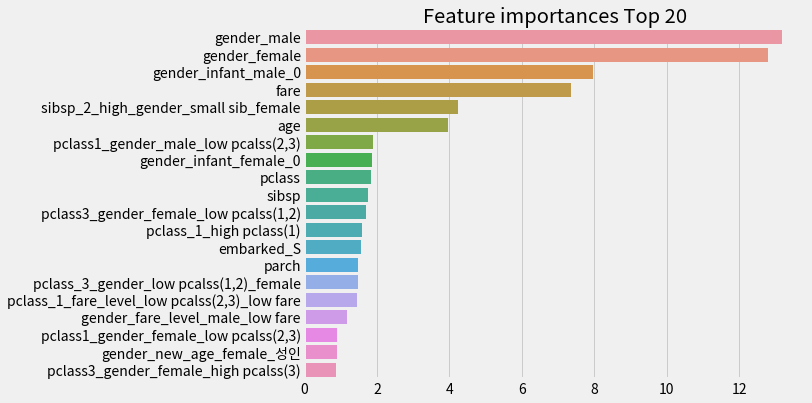

In [459]:
importances_values = modelV4.feature_importances_
importances = pd.Series(importances_values, index=scaled_tr.columns)
top20 = importances.sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [460]:
top_index = top20.index

In [461]:
top_index

Index(['gender_male', 'gender_female', 'gender_infant_male_0', 'fare',
       'sibsp_2_high_gender_small sib_female', 'age',
       'pclass1_gender_male_low pcalss(2,3)', 'gender_infant_female_0',
       'pclass', 'sibsp', 'pclass3_gender_female_low pcalss(1,2)',
       'pclass_1_high pclass(1)', 'embarked_S', 'parch',
       'pclass_3_gender_low pcalss(1,2)_female',
       'pclass_1_fare_level_low pcalss(2,3)_low fare',
       'gender_fare_level_male_low fare',
       'pclass1_gender_female_low pcalss(2,3)', 'gender_new_age_female_성인',
       'pclass3_gender_female_high pcalss(3)'],
      dtype='object')

In [464]:
drop_tr = scaled_tr[['gender_male', 'gender_female', 'gender_infant_male_0', 'fare',
       'sibsp_2_high_gender_small sib_female', 'age',
       'pclass1_gender_male_low pcalss(2,3)', 'gender_infant_female_0',
       'pclass', 'sibsp', 'pclass3_gender_female_low pcalss(1,2)',
       'pclass_1_high pclass(1)', 'embarked_S', 'parch',
       'pclass_3_gender_low pcalss(1,2)_female',
       'pclass_1_fare_level_low pcalss(2,3)_low fare',
       'gender_fare_level_male_low fare',
       'pclass1_gender_female_low pcalss(2,3)', 'gender_new_age_female_성인',
       'pclass3_gender_female_high pcalss(3)',
       'pclass_3_gender_high pcalss(3)_female',
       'pclass3_infant_0_high pcalss(3)', 'sibsp_2_high_gender_large sib_male',
       'embarked_C', 'pclass_1_low pcalss(2,3)',
       'general_family_general family', 'family_size_big family',
       'sibsp_2_high_gender_small sib_male',
       'pclass_3_fare_level_high pcalss(3)_low fare',
       'gender_fare_level_female_low fare']]
drop_te = scaled_te[['gender_male', 'gender_female', 'gender_infant_male_0', 'fare',
       'sibsp_2_high_gender_small sib_female', 'age',
       'pclass1_gender_male_low pcalss(2,3)', 'gender_infant_female_0',
       'pclass', 'sibsp', 'pclass3_gender_female_low pcalss(1,2)',
       'pclass_1_high pclass(1)', 'embarked_S', 'parch',
       'pclass_3_gender_low pcalss(1,2)_female',
       'pclass_1_fare_level_low pcalss(2,3)_low fare',
       'gender_fare_level_male_low fare',
       'pclass1_gender_female_low pcalss(2,3)', 'gender_new_age_female_성인',
       'pclass3_gender_female_high pcalss(3)',
       'pclass_3_gender_high pcalss(3)_female',
       'pclass3_infant_0_high pcalss(3)', 'sibsp_2_high_gender_large sib_male',
       'embarked_C', 'pclass_1_low pcalss(2,3)',
       'general_family_general family', 'family_size_big family',
       'sibsp_2_high_gender_small sib_male',
       'pclass_3_fare_level_high pcalss(3)_low fare',
       'gender_fare_level_female_low fare']]

In [497]:
modelV5 = CatBoostClassifier(random_state=21)

modelV5.fit(drop_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6859783	total: 2.77ms	remaining: 2.77s
1:	learn: 0.6790169	total: 6.1ms	remaining: 3.04s
2:	learn: 0.6712580	total: 9.07ms	remaining: 3.01s
3:	learn: 0.6639789	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6572650	total: 16.5ms	remaining: 3.29s
5:	learn: 0.6501734	total: 22.6ms	remaining: 3.74s
6:	learn: 0.6436220	total: 26.9ms	remaining: 3.82s
7:	learn: 0.6371469	total: 30.4ms	remaining: 3.77s
8:	learn: 0.6311468	total: 33.8ms	remaining: 3.72s
9:	learn: 0.6258679	total: 38.9ms	remaining: 3.85s
10:	learn: 0.6198111	total: 43.4ms	remaining: 3.9s
11:	learn: 0.6141151	total: 45.9ms	remaining: 3.78s
12:	learn: 0.6077336	total: 52.2ms	remaining: 3.96s
13:	learn: 0.6016903	total: 55.5ms	remaining: 3.91s
14:	learn: 0.5958117	total: 58.8ms	remaining: 3.86s
15:	learn: 0.5906837	total: 61.9ms	remaining: 3.81s
16:	learn: 0.5854843	total: 65.9ms	remaining: 3.81s
17:	learn: 0.5804366	total: 68.3ms	remaining: 3.73s
18:	learn: 0.5758390	total: 71.1ms	remaining: 3

In [498]:
score_tr = modelV5.score(drop_tr, y_tr)
score_te = modelV5.score(drop_te, y_te) 

score_tr, score_te  

(0.9126365054602185, 0.850909090909091)

In [512]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV5.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.899685110211426


In [503]:
modelV5.feature_importances_

array([ 8.03836201,  5.58684285, 10.24860133, 13.3359968 ,  1.84319641,
       11.34091653,  0.66415473,  4.14012797,  3.93707619,  3.93565398,
        2.19069594,  1.94154376,  2.21052224,  3.33116684,  3.59903045,
        1.28057032,  2.07895191,  1.27601757,  2.90501571,  0.62171751,
        0.96060466,  1.52741606,  1.27699982,  1.03172016,  0.61060709,
        2.31560812,  1.03286586,  3.40365245,  1.61174198,  1.72262277])

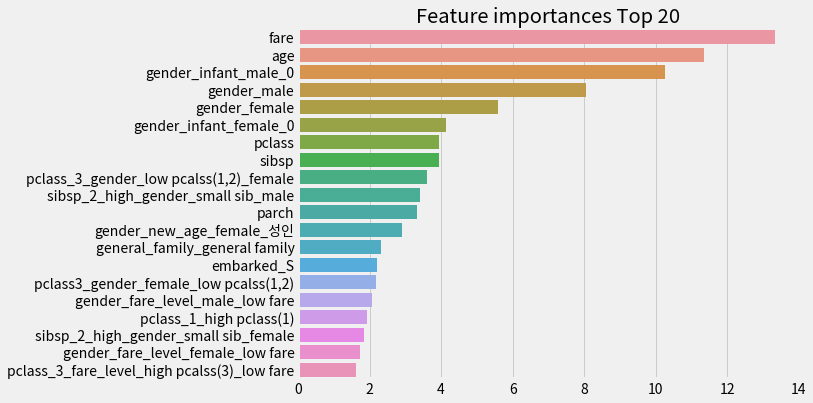

In [504]:
importances_values5 = modelV5.feature_importances_
importances5 = pd.Series(importances_values5, index=drop_tr.columns)
top20 = importances5.sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

NameError: name 'y_valid' is not defined

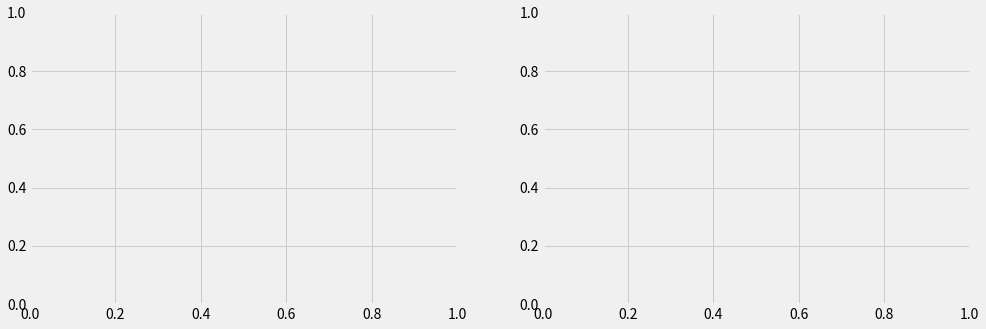

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_valid,pred_dummy) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

cm = confusion_matrix(y_valid,pred_clf) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[1])

plt.show()